## PROYECTO SHOW ME THE MONEY

In [644]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [645]:
train = pd.read_csv('train.csv')
train.head(15)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,59202,0,1.000000,63y,4,0.544965,3902.0,6,1,2,1,0.0
1,122913,0,0.007645,53y,0,4519.000000,0.0,13,0,2,0,0.0
2,111937,0,0.863713,30y,0,1.337353,3316.0,14,0,2,0,0.0
3,113491,0,0.058220,41y,0,0.289363,8065.0,9,0,1,0,2.0
4,116902,0,0.015711,50y,0,2784.000000,NaN,16,0,2,0,0.0
5,144758,0,0.225937,60y,0,0.443516,11250.0,15,0,2,1,0.0
6,85881,0,1.000000,56y,0,1.880086,1400.0,9,0,2,0,0.0
7,35093,0,0.011919,75y,0,0.145610,5500.0,9,0,1,0,0.0
8,52841,0,0.587950,45y,0,0.177412,6250.0,11,0,0,0,0.0
9,15631,0,0.306939,27y,0,0.239904,2500.0,6,0,0,0,0.0


In [646]:
train.isna().sum()

Id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           14524
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       1912
dtype: int64

In [647]:
#para quitarle a la columna de age lo de y.. ademas pasarlo a int
train['age'] = train['age'].str[0:-1].astype('int')
train.head(3)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,59202,0,1.000000,63,4,0.544965,3902.0,6,1,2,1,0.0
1,122913,0,0.007645,53,0,4519.000000,0.0,13,0,2,0,0.0
2,111937,0,0.863713,30,0,1.337353,3316.0,14,0,2,0,0.0


In [648]:
train['NumberOfDependents'].fillna(train['NumberOfDependents'].mean(), inplace=True) #para sustituir los NaN por la media de los NaN de la misma columna

In [649]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].mean(), inplace=True) #para sustituir los NaN por la media de los NaN de la misma columna

In [650]:
train.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,59202,0,1.000000,63,4,0.544965,3902.000000,6,1,2,1,0.0
1,122913,0,0.007645,53,0,4519.000000,0.000000,13,0,2,0,0.0
2,111937,0,0.863713,30,0,1.337353,3316.000000,14,0,2,0,0.0
3,113491,0,0.058220,41,0,0.289363,8065.000000,9,0,1,0,2.0
4,116902,0,0.015711,50,0,2784.000000,6647.915549,16,0,2,0,0.0


In [651]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   SeriousDlqin2yrs                      73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  int32  
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         73363 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [652]:
train.isna().sum()

Id                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [653]:
X = train[['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']]
y = train['SeriousDlqin2yrs']

In [654]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [655]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [656]:
lr.fit(X_train, y_train)

C:\Users\Braulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [657]:
predicciones = lr.predict(X_test)

In [658]:
predicciones

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [659]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
#para ver las puntuaciones

In [660]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20575
           1       0.40      0.01      0.02      1434

    accuracy                           0.93     22009
   macro avg       0.67      0.50      0.49     22009
weighted avg       0.90      0.93      0.90     22009



In [661]:
confusion_matrix(y_test, predicciones)

array([[20557,    18],
       [ 1422,    12]], dtype=int64)

In [662]:
#para sacar las probabilidades
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

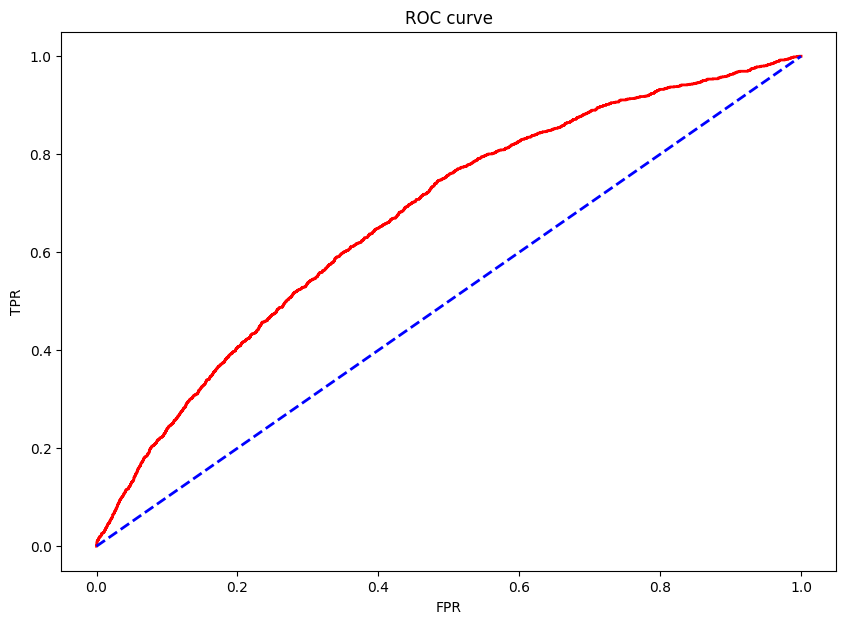

In [663]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))

#AÑADIR LA ROC
plt.plot(fpr,tpr,color='red', lw=2, label= 'ROC curve')

#random FPR y TPR
plt.plot([0,1], [0,1], color='blue', lw=2, linestyle='--')

#titulo y label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# ENTREGA

In [664]:
test = pd.read_csv('test.csv')
test.head(1)

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,11631,0.0,38y,1,0.075978,3500.0,5,1,0,0,1.0


In [665]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    31442 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 2   age                                   31442 non-null  object 
 3   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 4   DebtRatio                             31442 non-null  float64
 5   MonthlyIncome                         25185 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 7   NumberOfTimes90DaysLate               31442 non-null  int64  
 8   NumberRealEstateLoansOrLines          31442 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  31442 non-null  int64  
 10  NumberOfDependents                    30605 non-null  float64
dtypes: float64(4), 

In [666]:
#para quitarle a la columna de age lo de y.. ademas pasarlo a int
test['age'] = test['age'].str[0:-1].astype('int')
test.head(3)

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,11631,0.000000,38,1,0.075978,3500.0,5,1,0,0,1.0
1,74682,0.184801,54,0,0.300818,20297.0,9,0,4,0,3.0
2,70312,0.026796,43,0,2.129870,1000.0,6,0,1,0,2.0


In [667]:
test['NumberOfDependents'].fillna(test['NumberOfDependents'].mean(), inplace=True)

In [668]:
test['MonthlyIncome'].fillna(test['MonthlyIncome'].mean(), inplace=True)

In [669]:
lr.fit(X_test, y_test)

C:\Users\Braulio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [670]:
predicciones = pd.DataFrame(lr.predict(X))

In [671]:
#para hacer el dataframe final
DTpredicciones = pd.DataFrame(predicciones)
DTpredicciones.reset_index(drop=True, inplace=True) #para que se quiten los indices
id = test.loc[:, ['Id']]
id.reset_index(drop=True, inplace=True)
df_entrega = id.join(DTpredicciones) #unir

In [672]:
df_entrega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      31442 non-null  int64
 1   0       31442 non-null  int64
dtypes: int64(2)
memory usage: 491.4 KB


In [673]:
df_entrega.columns = ['Id', 'SeriousDlqin2yrs']

In [674]:
df_entrega.to_csv('sample_submission.csv', index = False)